# 데이터분석프로그래밍 12주차 실습

## 실습 시작 전 유의사항

※ 상단 메뉴에서 '**파일 - 드라이브에 사본 저장**' 진행 후 시작하세요.\
※ 프로젝트 제목 뒤에 본인의 이름과 학번을 작성하세요. `ex) DataAnalysisProgramming_#01_202312345_정재호.ipynb`

## 실습 개요
- 분류 (Classification)
  - Logistic Regression
  - K-NN
  - Naive bayes

---

## 분류 (1)
데이터가 어떤 레이블에 해당될지 예측하는 작업입니다.

다양한 분류 기법들을 알아보고, 이를 sklearn에서 제공하는 도구를 통해 실습해보겠습니다.

### 로지스틱 회귀 (Logistic Regression)

데이터의 레이블이 **`[Yes / No]`**, **`[A / not A]`**와 같이 두 그룹으로 나뉘는 **'이진 분류 문제'**에서 주로 사용하는 분류 기법입니다.

저번 주 실습에서 사용했던 와인 품질 데이터셋을 사용하여 로지스틱 회귀를 실습 해보겠습니다.

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(precision=5, suppress=True)


# 와인 품질 데이터셋 불러오기
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_df = pd.read_csv(url, delimiter=";")   # 세미콜론으로 구분된 데이터셋에 대한 처리

wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


이 데이터셋에는 각각의 와인이 0~10의 수치로 품질(quality)이 매겨져 있습니다.

우리는 레이블이 두 그룹으로 나뉘기를 원하기 때문에,\
임의로 quality가 5 이하면 bad(0), 5 보다 크면 good(1)로 설정하겠습니다.

In [ ]:
df = wine_df.copy()
df['label'] = (df['quality'] > 5).astype(int)   # bool을 int로 변환
df.drop(columns='quality', inplace=True)    # 기존의 quality 변수는 제거

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


X는 데이터의 특징(feature)들이고, y는 데이터의 레이블이 되도록 구성해주겠습니다.

다음으로는 학습용 데이터와 테스트용 데이터를 분리하기 위해 sklearn의 train_test_split 함수를 사용해줍니다.


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns={'label'})
y = df['label']

# X와 y 집합을 학습용과 테스트용으로 분리 (7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

sklearn.linear_model에서는 로지스틱 회귀를 수행할 수 있도록 LogisticRegression을 제공합니다.

여타 sklearn 도구들과 마찬가지로 **fit 메소드**를 통해 '데이터와 레이블' 집합을 학습합니다.

이렇게 학습된 모델은, **predict 메소드**를 사용하여 데이터의 레이블을 예측할 수 있습니다.

In [ ]:
from sklearn.linear_model import LogisticRegression

# LogisticRegression 객체를 생성
logreg = LogisticRegression()

# train 데이터셋으로 학습 (fit 메소드)
logreg.fit(X_train, y_train)

# test 데이터셋의 레이블을 예측 (predict 메소드)
predictions = logreg.predict(X_test)

# 전체 중 맞은 데이터의 비율을 계산
acc = (predictions == y_test).sum() / len(y_test)

print(f'정확도: {100*acc:.2f}%')

정확도: 72.92%


로지스틱 회귀는 데이터의 여러 변수를 수치적으로 변화하여 하나의 값으로 만들고,\
이를 시그모이드(로지스틱) 함수를 통해 0~1로 만들어서 특정 레이블에 해당될 확률을 구하는 것이 주 과정입니다.

<figure>
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/640px-Logistic-curve.svg.png" width="40%">
  <figcaption>x(가로축)이 주어지면 0~1의 값 y(세로축)을 반환하는 시그모이드 함수</figcaption>
</figure>

</br>

그렇기 때문에 predict_proba 메소드를 이용하면, 데이터가 각 레이블에 대해 해당될 확률들을 예측할 수 있습니다.

In [ ]:
print(logreg.predict_proba(X_test[:5]))

[[0.60382 0.39618]
 [0.86775 0.13225]
 [0.49023 0.50977]
 [0.54745 0.45255]
 [0.3158  0.6842 ]]


### k-NN 분류 (k-Nearest Neighbors Classifier)

K-NN 분류는 주변의 가장 가까운 K개의 이웃 데이터를 기반으로 레이블을 결정하는 '메모리 기반'의 분류 기법입니다.

이러한 알고리즘 구조 때문에 데이터의 분포가 비정규적이거나 비선형적이어도 관계를 잘 포착해줍니다.

그러나 반대로, 데이터의 크기가 크면 연산 횟수가 많아지고,\
이상치가 많다면 성능이 크게 저하될 수 있다는 단점도 있습니다.

저번 주 실습에서 사용했던 Iris(붓꽃) 데이터셋을 사용하여 k-NN 분류를 실습해보겠습니다.

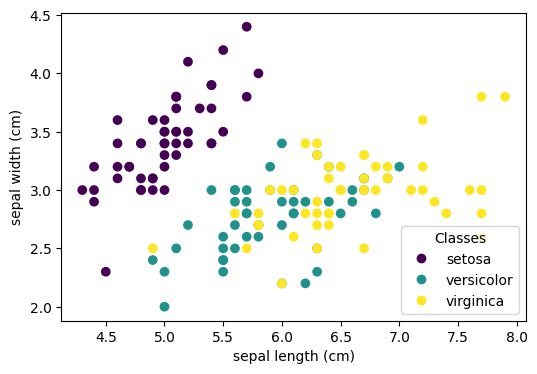

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt

# 데이터셋 준비
iris = datasets.load_iris() # data와 target으로 이뤄진 sklearn 데이터셋
X = iris.data[:, [0, 1]]    # sepal length와 sepal width를 feature로 사용
y = iris.target

# 꽃받침(sepal) 크기에 대해 데이터셋 시각화
fig, ax = plt.subplots(figsize=(6, 4))
scatter = ax.scatter(X[:, 0], X[:, 1], c=y)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
ax.legend(scatter.legend_elements()[0], iris.target_names, loc='lower right', title='Classes')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42) # 극단적으로 train, test비율을 6:4로 해보았다.

sklearn.neighbors에서는 k-NN 분류 수행할 수 있도록 KNeighborsClassifier를 제공합니다.

마찬가지로 fit과 predict 메소드를 통해 실습을 진행해봅시다.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# KNeighborsClassifier 객체를 생성. n_neighbors를 정해줘야 한다.
knn_model = KNeighborsClassifier(n_neighbors=6)

# train 데이터셋으로 학습 (fit 메소드)
knn_model.fit(X_train, y_train)

# test 데이터셋의 레이블을 예측 (predict 메소드)
predictions = knn_model.predict(X_test)

# 전체 중 맞은 데이터의 비율을 계산
acc = (predictions == y_test).sum() / len(y_test)

print(f'정확도: {100*acc:.2f}%')

정확도: 83.33%


k-NN 분류는 데이터로부터 k개의 주변 이웃 데이터들을 확인해서, 어떤 레이블을 가장 많이 갖는지를 바탕으로 레이블을 결정합니다.

<figure>
  <img src="https://2.bp.blogspot.com/-EK4tA2525EM/U-c6Q4jJuwI/AAAAAAAADjw/hdqRXuunpnQ/s1600/knn.png" width="30%">
  <figcaption>k에 따라서 레이블이 달라지는 데이터 예제</figcaption>
</figure>

</br>

그래서 predict_proba 메소드는, k개 데이터 중에서 각 레이블에 대한 비율을 확률의 의미로 나타내줍니다.



In [ ]:
knn_model.predict_proba(X_test[:5])

array([[0.     , 0.66667, 0.33333],
       [1.     , 0.     , 0.     ],
       [0.     , 0.     , 1.     ],
       [0.     , 0.66667, 0.33333],
       [0.     , 0.5    , 0.5    ]])

아래 코드는 각 레이블에 대해 모델이 학습한 결정 경계입니다.

해당 형태에서 볼 수 있듯, 비선형이고 복잡한 분포를 잘 학습한 것을 볼 수 있습니다.

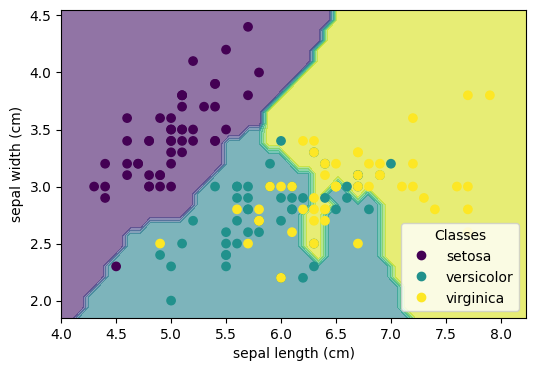

In [ ]:
import numpy as np

x_min, x_max = X[:, 0].min() - 0.3, X[:, 0].max() + 0.4
y_min, y_max = X[:, 1].min() - 0.15, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.09),
                     np.arange(y_min, y_max, 0.09))

Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(6, 4))
contour = ax.contourf(xx, yy, Z, alpha=0.6)
scatter = ax.scatter(X[:, 0], X[:, 1], c=y)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
ax.legend(scatter.legend_elements()[0], iris.target_names, loc='lower right', title='Classes')
plt.show()

### Naive Bayes Classifier

베이즈 이론에 기초하여 데이터의 통계를 통해, 데이터가 각 레이블에 해당될 확률을 계산하는 분류 기법입니다.\
데이터의 모든 특징들이 독립적일 것이라는 가정을 하기 때문에 Naive라는 수식이 붙었습니다.

이 중, 데이터가 정규(가우시안) 분포를 따르는 연속적인 데이터일 것이라 가정하고 계산하는\
Gaussian Naive Bayes 분류기를 실습해보도록 하겠습니다.

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터셋 준비
iris = datasets.load_iris() # data와 target으로 이뤄진 sklearn 데이터셋
X = iris.data     # 모든 변수를 feature로 사용
y = iris.target

각 특징들이 실제로 정규분포를 따른다면 분류기의 성능이 더 좋아집니다.

아래는 각 특징들을 클래스 별로 나타낸 히스토그램입니다.

얼추 정규분포를 따르는 것으로 보이기 때문에 분류기가 잘 작동할 것으로 보입니다.

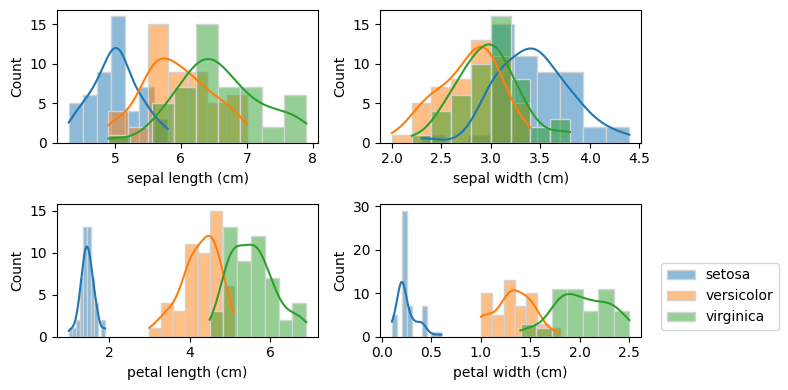

In [ ]:
fig = plt.figure(figsize=(8, 4))
for i in range(X.shape[1]):
  ax = fig.add_subplot(2, 2, i+1)
  ax.set_xlabel(iris.feature_names[i])
  sns.histplot(X[y==0, i], kde=True, label=iris.target_names[0], edgecolor='lightgray', alpha=0.5)
  sns.histplot(X[y==1, i], kde=True, label=iris.target_names[1], edgecolor='lightgray', alpha=0.5)
  sns.histplot(X[y==2, i], kde=True, label=iris.target_names[2], edgecolor='lightgray', alpha=0.5)

plt.legend(bbox_to_anchor=(1.05, 0), loc='lower left')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42) # 극단적으로 train, test비율을 6:4로 해보았다.

sklearn.naive_bayes에서는 가우시안 Naive Bayes 분류 수행할 수 있도록 GaussianNB를 제공합니다.

마찬가지로 fit과 predict 메소드를 통해 실습을 진행해봅시다.

In [ ]:
from sklearn.naive_bayes import GaussianNB

# GaussianNB 객체를 생성
nb_model = GaussianNB()

# train 데이터셋으로 학습 (fit 메소드)
nb_model.fit(X_train, y_train)

# test 데이터셋의 레이블을 예측 (predict 메소드)
predictions = nb_model.predict(X_test)

# 전체 중 맞은 데이터의 비율을 계산
acc = (predictions == y_test).sum() / len(y_test)

print(f'정확도: {100*acc:.2f}%')

정확도: 96.67%


GaussianNB는 아래와 같은 베이즈 이론을 메인 아이디어로 합니다.

$P(C_k | x) = \frac{P(x | C_k) \times P(C_k)}{P(x)}$

이 때, $P(x | C_k)$는 각 변수가 독립적이고, 정규 분포를 따른다는 가정 하에,\
아래와 같은 식을 통해 구할 수 있습니다.

$P(x_i | C_k) = \frac{1}{\sqrt{2\pi\sigma_{k,i}^2}} \exp\left(- \frac{(x_i - \mu_{k,i})^2}{2\sigma_{k,i}^2}\right)$

</br>

그래서 predict_proba 메소드를 통해 각 레이블에 대한 확률을 계산할 수 있습니다.

In [ ]:
print(nb_model.predict_proba(X_test[:5]))

[[0.      0.99585 0.00415]
 [1.      0.      0.     ]
 [0.      0.      1.     ]
 [0.      0.9775  0.0225 ]
 [0.      0.87036 0.12964]]


## 실습 종료 전 유의사항

※ 완료 시 우측 상단 프로필 옆 '**공유 - 액세스를 *링크가 있는 모든 사용자*로 전환**' 후 복사한 링크를 이루리 과제 란에 업로드 하세요.

<img src="https://drive.google.com/uc?id=1Zj1FKIz0sanqUfkfr3scp5M-dDgMFxYQ" height=300>

</br>

※ 추가로 상단 메뉴 '**파일 - 다운로드 - .ipynb**' 로 다운로드 후 첨부 파일로 업로드 하세요.

※ 즉, 과제의 텍스트란에는 링크를, 파일 첨부란에는 .ipynb 파일을 제출하십시오.